[[  -8.49004452    5.14587633]
 [ 513.51824265  515.91065149]
 [  -2.09571225  508.64135354]]


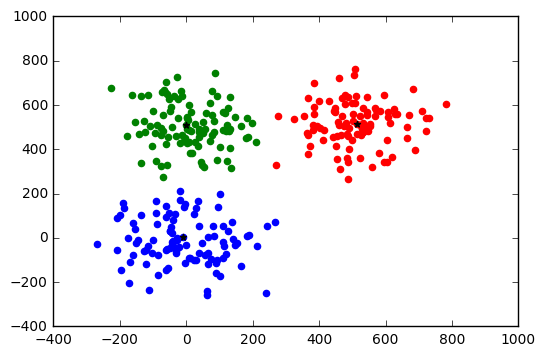

In [491]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
                    
def kmeanCluster(initial_centroids, points):
    if type(initial_centroids) == np.ndarray:
        initial_centroids = initial_centroids.tolist()
    
    # N-Dimensional Euclidean Distance
    def euclidean_dist(point_1, point_2):
        if (len(point_1) == len(point_2)):     
            dimensions = len(point_1)
        else:
            raise ValueError('Incompatible Input parameters')
        accumulated = 0
        for dim in range(dimensions):   
            accumulated = accumulated + ((point_1[dim] - point_2[dim])**2)
        return np.sqrt(accumulated)
    
    def sum_euclidean(points, new_points):
        sum_value = 0.;

        if len(points) == len(new_points):
            for index, point in enumerate(points):
                sum_value = sum_value + euclidean_dist(points[index], new_points[index])

            return sum_value
        else:
            raise ValueError('Two lists have an unequal number of elements')

        return None
    
    #N-Dimensional Centroid calculation
    def calculateNewCentroid(points, cen_type='mean'):
        least_dist = 1e99
        new_centroid = None
        dimensions = len(points[0])
        center_point = []
        
#       Median Centroid
        if (cen_type=='median'):
            for dim in range(dimensions):
                bound_upper, bound_lower = max(points[:, dim]), min(points[:, dim])
                center_point.append((bound_upper + bound_lower)/2.)
#       Mean Centroid
        if (cen_type=='mean'):
            for dim in range(dimensions):
                center_point.append(np.mean(points[:, dim]))
            
        for point in points:
            if (euclidean_dist(point, center_point) < least_dist):
                least_dist = euclidean_dist(point, center_point)
                new_centroid = point

        return new_centroid
        
    final_clusters = [None] #Funny work-around making recursive step references to this local variable instead of copying
    
    def cluster(initial_centroids, points):
        clustered_indexes, clustered_records = [], []
        for point in points:
            least_distClusterIndex = [None, 1e99]        
            for centroid_index, centroid in enumerate(initial_centroids):
                if (euclidean_dist(centroid, point) < least_distClusterIndex[1]):
                    least_distClusterIndex[0] = centroid_index
                    least_distClusterIndex[1] = euclidean_dist(centroid, point)

            clustered_records.append(point)
            clustered_indexes.append(least_distClusterIndex[0])
        
        clusterized = np.append(np.array(clustered_indexes)[np.newaxis].T, np.array(clustered_records), axis=1)

        cluster_indexes = set(clusterized[:, 0])

        clusters = []
        for cluster_index in cluster_indexes:
            clusters.append(clusterized[clusterized[:, 0] == cluster_index][:, 1:])
        
        new_initial_centroids = []
        for c in clusters:
            new_initial_centroids.append(calculateNewCentroid(c))
        
        #Recursive Step
        if(sum_euclidean(initial_centroids, new_initial_centroids) == 0):
            final_clusters[0] = clusters
            return new_initial_centroids
        else: 
            return cluster(new_initial_centroids, points)        
    
    return cluster(initial_centroids, points), final_clusters[0]
   
def twoDimensionalDataGen():
    arr = []
    for i in range(100):
        arr.append([np.random.normal(scale=100), np.random.normal(scale=100)])
        arr.append([500 + np.random.normal(scale=100), 500 + np.random.normal(scale=100)])
        arr.append([np.random.normal(scale=100), 500 + np.random.normal(scale=100)])
    return np.array(arr)

arr = twoDimensionalDataGen()
output = kmeanCluster([arr[0], arr[1], arr[2]], arr)
final_centroids = output[0][:]
result = output[1][:]

plt.scatter(result[0][:, 0], result[0][:, 1], color="blue")
plt.scatter(result[1][:, 0], result[1][:, 1], color="red")
plt.scatter(result[2][:, 0], result[2][:, 1], color="green")

# print final_centroids
final_centroids = np.array(final_centroids)
print final_centroids

plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color="black", marker='*')

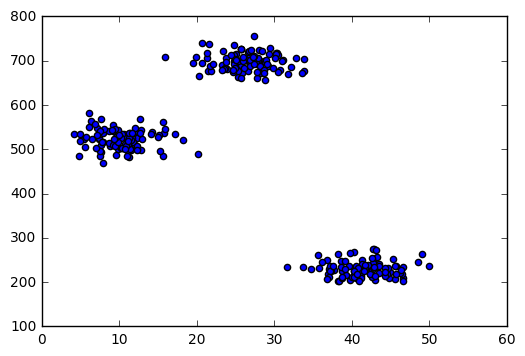

In [470]:
import scipy.stats as stats
def dataGen(n_points, n_synthetic_clusters=2, std=0.035):
    def truncated_normal(lower, upper, mean, std):
        return stats.truncnorm.rvs((lower-mean)/std,(upper-mean)/std,loc=mean,scale=std)
        
    synthetic_cluster_origins = []
    
    for i in range(n_synthetic_clusters):
        synthetic_cluster_origins.append([np.random.rand()*100, #Math Score (0 to 100)
                    200+np.random.rand()*(800-200), #SAT Score (200 to 800)
                    1 if (np.random.rand() > 0.5) else 0, #Gender (Discrete 1 or 0)
                    500+np.random.rand()*(10000-500)])
    
    arr = []
    for i in range(n_points):
        for origin in synthetic_cluster_origins:
            def randRow():
                row = [
                    truncated_normal(0, 100, origin[0], std*100),
                    truncated_normal(200, 800, origin[1], std*600),
                    1 if (np.random.rand() > 0.5) else 0,
                    truncated_normal(500, 10000, origin[3], std*9500)
                ]
                return row
            
            arr.append(randRow())
            
    return np.array(arr)

genned_data = dataGen(100, n_synthetic_clusters=3)

plt.scatter(genned_data[:, 0], genned_data[:, 1])

[[   6.11959528   -2.67238279]
 [ 504.48337764  494.56462683]
 [  17.17000811  494.3519447 ]]


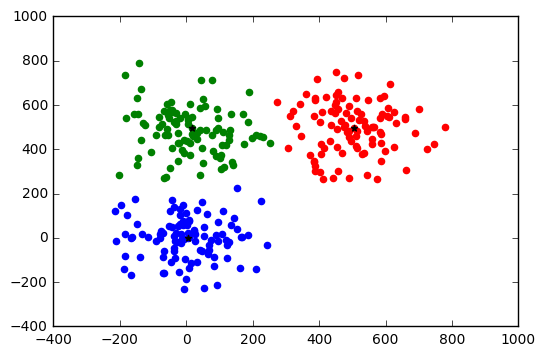

In [471]:
import pandas as pd

output = kmeanCluster(twoDimensionalDataGen()[:3], twoDimensionalDataGen())

final_centroids = output[0][:]
result = output[1][:]

for cluster_index, cluster in enumerate(result):
    df_result = pd.DataFrame(cluster)
    df_result.to_csv("cluster_%s.csv" % cluster_index, index_col=None, header=None)

plt.scatter(result[0][:, 0], result[0][:, 1], color="blue")
plt.scatter(result[1][:, 0], result[1][:, 1], color="red")
plt.scatter(result[2][:, 0], result[2][:, 1], color="green")

final_centroids = np.array(final_centroids)
print final_centroids

plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color="black", marker='*')